In [85]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [38]:
df = pd.read_csv('Train_Data.csv')
X = df.drop('attack', axis=1)
y = df['attack']
df_test = pd.read_csv('Test_Data.csv')

In [60]:
# print(df.shape)
print(X.shape)
print(df_test.shape)


(86845, 42)
(21712, 42)


In [61]:
# DF = X.append(df_test, ignore_index=True)
DF = pd.concat([X, df_test], ignore_index=True)

In [62]:
DF

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,15,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,116,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18
2,0,tcp,http,SF,222,945,0,0,0,0,...,255,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21
3,0,tcp,http,SF,235,1380,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,3,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108552,0,tcp,http,SF,273,4367,0,0,0,0,...,255,1.00,0.00,0.03,0.01,0.00,0.0,0.00,0.0,21
108553,0,udp,domain_u,SF,45,45,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.00,0.0,0.00,0.0,18
108554,0,tcp,imap4,S0,0,0,0,0,0,0,...,10,0.04,0.08,0.00,0.00,1.00,1.0,0.00,0.0,20
108555,0,tcp,ftp_data,SF,29,0,0,0,0,0,...,45,0.47,0.07,0.47,0.04,0.00,0.0,0.00,0.0,21


In [45]:
86845+21712

108557

In [65]:
categorical_cols = DF.select_dtypes(include='object').columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = pd.DataFrame(encoder.fit_transform(DF[categorical_cols]))
DF.drop(categorical_cols, axis=1, inplace=True)
DF = pd.concat([DF, encoded_cols], axis=1)
DF

C:\Users\mdafz\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,68,69,70,71,72,73,74,75,76,77
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1239,400,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,222,945,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,235,1380,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108552,0,273,4367,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
108553,0,45,45,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
108554,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
108555,0,29,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
X_df = DF.iloc[:86845, :117]
X_df

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,68,69,70,71,72,73,74,75,76,77
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1239,400,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,222,945,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,235,1380,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,0,216,674,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86841,0,368,1725,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86842,28,1483,4152,0,0,0,30,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86843,0,1679,385,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
T_df = DF.iloc[-21712:, -117:]
T_df

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,68,69,70,71,72,73,74,75,76,77
86845,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86846,0,199,1721,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86847,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
86848,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
86849,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108552,0,273,4367,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
108553,0,45,45,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
108554,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
108555,0,29,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [68]:
y

0        1
1        0
2        0
3        0
4        1
        ..
86840    0
86841    0
86842    0
86843    0
86844    0
Name: attack, Length: 86845, dtype: int64

In [70]:
X_train, X_cv, y_train, y_cv = train_test_split(X_df, y, test_size=0.2, random_state=42)

In [71]:
X_train

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,68,69,70,71,72,73,74,75,76,77
20364,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50230,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
85039,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21537,0,326,1084,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67284,0,194,458,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,317,6821,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54886,0,7196,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
76820,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0,217,1262,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
y_train

20364    1
50230    1
85039    1
21537    0
67284    0
        ..
6265     0
54886    0
76820    1
860      0
15795    1
Name: attack, Length: 69476, dtype: int64

In [75]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(117,)),
        Dense(units = 25, activation = 'relu'),
        Dense(units = 15, activation = 'relu'),
        Dense(units = 1, activation = 'sigmoid'),
          
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)

In [76]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 25)                  │           2,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,356 (13.11 KB)

 Trainable params: 3,356 (13.11 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])


history = model.fit(
    X_train,y_train,
    epochs=10,
    validation_data=(X_cv, y_cv)
)

Epoch 1/10
2172/2172 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 1.0000 - loss: 4.4512e-06 - val_accuracy: 1.0000 - val_loss: 9.7753e-09
Epoch 2/10
2172/2172 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 1.0000 - loss: 1.6192e-09 - val_accuracy: 1.0000 - val_loss: 6.1429e-08
Epoch 3/10
2172/2172 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 1.0000 - loss: 7.8145e-10 - val_accuracy: 1.0000 - val_loss: 3.4896e-08
Epoch 4/10
2172/2172 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 1.0000 - loss: 2.4852e-10 - val_accuracy: 1.0000 - val_loss: 2.2991e-08
Epoch 5/10
2172/2172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 1.0803e-10 - val_accuracy: 1.0000 - val_loss: 1.7711e-08
Epoch 6/10
2172/2172 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 1.0000 - loss: 6.5217e-11 - val_accuracy: 1.0000 - val_loss: 1.4708e-08
Epoch 7/10
2172/2172 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 1.0000 - loss: 4.1209e-04 - val_accuracy: 0.9999 - val_loss: 1.7491e-04
Epoch 8/10
2172/2172 ━━━

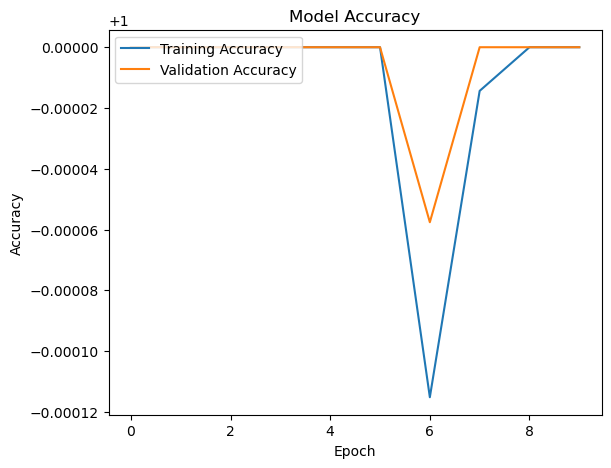

In [86]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

In [97]:
# Get predictions for training data
test_preds = model.predict(T_df)

679/679 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step


In [98]:
test_preds

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [99]:
test_preds.shape

(21712, 1)

In [104]:
print(test_preds)

[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [106]:
# Thank You